<a href="https://colab.research.google.com/github/CarlaFFochs/Nuclio_DataScience_Projects/blob/main/Project_Renfe_ML_en_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MASTER DATA SCIENCE: NUCLIO
## PROJECT RENFE: PREPARAR EL DATASET PARA LA PREDICCION DE PRECIOS DE LOS BILLETES DE RENFE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importamos librería
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium #mapas
import plotly.express as px #graficos de barras

In [3]:
#leemos el fichero de renfe
df_renfe=pd.read_csv("/content/drive/MyDrive/MASTER DATA SCIENCE/PROYECTOS/Project Renfe/dataset/renfe.csv",sep=";")
df_renfe.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75


In [4]:
#fecha consulta, persona ha hecho una consulta, al hacer el click
#la fecha_incio es la fecha que ha buscado el viaje
#fecha_fin, es la fecha de llegada del viaje. SOLO HAY VIAJE DE IDA, no tenemos en cuenta la VUELTA
#hemos de predecir el PRECIO, todo lo hemos de convertir en numeros, todas las variables categoricas

In [5]:
'''PREGUNTA 2
2. ¿Puedes decir en cuáles variables existen nulos?
'''

'PREGUNTA 2\n2. ¿Puedes decir en cuáles variables existen nulos?\n'

In [6]:
df_renfe.isnull().value_counts()

FECHA_CONSULTA  FECHA_INICIO  FECHA_FIN  CIUDAD_ORIGEN  CIUDAD_DESTINO  TIPO_TREN  TIPO_TARIFA  CLASE  PRECIO
False           False         False      False          False           False      False        False  False     355038
                                                                                                       True       27187
                                                                                   True         True   True        1343
dtype: int64

In [7]:
'''PREGUNTA 3
3. Hagamos un df_renfe.info(), ¡Marca todas las INCORRECTAS!
'''

'PREGUNTA 3\n3. Hagamos un df_renfe.info(), ¡Marca todas las INCORRECTAS!\n'

In [8]:
df_renfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FECHA_CONSULTA  383568 non-null  object 
 1   FECHA_INICIO    383568 non-null  object 
 2   FECHA_FIN       383568 non-null  object 
 3   CIUDAD_ORIGEN   383568 non-null  object 
 4   CIUDAD_DESTINO  383568 non-null  object 
 5   TIPO_TREN       383568 non-null  object 
 6   TIPO_TARIFA     382225 non-null  object 
 7   CLASE           382225 non-null  object 
 8   PRECIO          355038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 26.3+ MB


In [9]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 3############
for i in ["FECHA_CONSULTA","FECHA_INICIO","FECHA_FIN"]:
    df_renfe[i]=pd.to_datetime(df_renfe[i])
#####################################

In [10]:
'''PREGUNTA 4'''
##########PREGUNTA 4. INTERPRETAR EL CODIGO (1)############
df_renfe["TIEMPO_VIAJE"]=(df_renfe["FECHA_FIN"]-df_renfe["FECHA_INICIO"])/np.timedelta64(1,'m')
df_renfe["DIF_INI_BUS"]=(df_renfe["FECHA_INICIO"]-df_renfe["FECHA_CONSULTA"])/np.timedelta64(1,'m')
#####################################

In [11]:
'''PREGUNTA 5'''
'''Hacer un histograma de la columna "DIF_INI_BUS", ¿Qué se puede deducir?'''

'Hacer un histograma de la columna "DIF_INI_BUS", ¿Qué se puede deducir?'

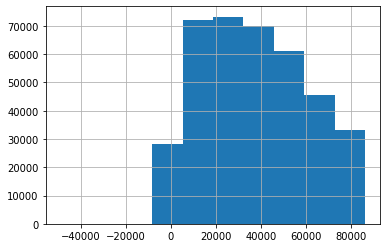

In [12]:
df_renfe["DIF_INI_BUS"].hist()

In [13]:
df_renfe[df_renfe["DIF_INI_BUS"]<0].value_counts().count()

513

In [14]:
'''REALIZAR LO COMENTADO EN LA PREGUNTA 5'''
'''HINT: SI SE QUIERE BORRAR SE PUEDE USAR EL .drop([condicion].index)'''

'HINT: SI SE QUIERE BORRAR SE PUEDE USAR EL .drop([condicion].index)'

In [15]:
df_renfe.drop(df_renfe[df_renfe["DIF_INI_BUS"]<0].index, axis=0, inplace=True)

In [16]:
df_renfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382897 entries, 0 to 383567
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FECHA_CONSULTA  382897 non-null  datetime64[ns]
 1   FECHA_INICIO    382897 non-null  datetime64[ns]
 2   FECHA_FIN       382897 non-null  datetime64[ns]
 3   CIUDAD_ORIGEN   382897 non-null  object        
 4   CIUDAD_DESTINO  382897 non-null  object        
 5   TIPO_TREN       382897 non-null  object        
 6   TIPO_TARIFA     381581 non-null  object        
 7   CLASE           381581 non-null  object        
 8   PRECIO          354525 non-null  float64       
 9   TIEMPO_VIAJE    382897 non-null  float64       
 10  DIF_INI_BUS     382897 non-null  float64       
dtypes: datetime64[ns](3), float64(3), object(5)
memory usage: 35.1+ MB


In [17]:
df_renfe.reset_index(drop=True, inplace=True)

In [18]:
#cuando borramos filas, lo que hemos de hacer es resetear los index

In [19]:
'''PREGUNTA 6
6. ¿Existen filas duplicadas?¿Cuantas filas son?
'''

'PREGUNTA 6\n6. ¿Existen filas duplicadas?¿Cuantas filas son?\n'

In [20]:
df_renfe.duplicated().value_counts()

False    382864
True         33
dtype: int64

In [21]:
'''SI EXISTEN DUPLICADOS BORRARLOS Y LLAMAR AL DF: df_renfe_sin_duplicados, SINO EXISTE NO CREAR UN NUEVO DATAFRAME'''


'SI EXISTEN DUPLICADOS BORRARLOS Y LLAMAR AL DF: df_renfe_sin_duplicados, SINO EXISTE NO CREAR UN NUEVO DATAFRAME'

In [22]:
df_renfe_sin_duplicados = df_renfe.drop_duplicates().copy() #trec els duplicats ii faig una copia, i ho guardo a una variabe
df_renfe_sin_duplicados.value_counts().count()

354507

In [23]:
df_renfe_sin_duplicados.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333


In [24]:
'''PREGUNTA 7
7. Luego de eliminar los duplicados, ¿Aún existen nulos?
'''

'PREGUNTA 7\n7. Luego de eliminar los duplicados, ¿Aún existen nulos?\n'

In [25]:
df_renfe_sin_duplicados.isnull().value_counts().count()

3

In [26]:
df_renfe_sin_duplicados.isnull().sum()

FECHA_CONSULTA        0
FECHA_INICIO          0
FECHA_FIN             0
CIUDAD_ORIGEN         0
CIUDAD_DESTINO        0
TIPO_TREN             0
TIPO_TARIFA        1311
CLASE              1311
PRECIO            28357
TIEMPO_VIAJE          0
DIF_INI_BUS           0
dtype: int64

In [27]:
'''PREGUNTA 8'''
##########PREGUNTA 8. INTERPRETAR EL CODIGO (2º)############
for col in ['FECHA_CONSULTA', 'FECHA_INICIO', 'FECHA_FIN']:
    df_renfe_sin_duplicados[col + '_HORA'] = df_renfe_sin_duplicados[col].dt.hour
    df_renfe_sin_duplicados[col + '_NOMBREDIA'] = df_renfe_sin_duplicados[col].dt.day_name()
    ##O .dt.weekday_name
    df_renfe_sin_duplicados[col + '_DIA'] = df_renfe_sin_duplicados[col].dt.day
    df_renfe_sin_duplicados[col + '_MES'] = df_renfe_sin_duplicados[col].dt.month
    
    del df_renfe_sin_duplicados[col]

df_renfe_sin_duplicados.head()
#####################################

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000,1,Saturday,25,5,20,Friday,28,6,23,Friday,28,6
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667,13,Saturday,22,6,10,Sunday,14,7,13,Sunday,14,7
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000,6,Wednesday,17,4,13,Thursday,23,5,16,Thursday,23,5
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667,21,Friday,10,5,14,Wednesday,29,5,22,Wednesday,29,5
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333,19,Thursday,9,5,13,Wednesday,26,6,16,Wednesday,26,6


In [28]:
'''PREGUNTA 9
9. En el precio existen nulos, ¿Qué porcentaje representa del total del dataset?
'''

'PREGUNTA 9\n9. En el precio existen nulos, ¿Qué porcentaje representa del total del dataset?\n'

In [29]:
df_renfe_sin_duplicados["PRECIO"].isnull().value_counts(normalize=True) #el precio puede ser nulo, porque ha tardado mucho en cargar la página..

False    0.925935
True     0.074065
Name: PRECIO, dtype: float64

In [30]:
df_renfe_sin_duplicados["PRECIO"].isnull().sum()/df_renfe_sin_duplicados.shape[0]*100  #una altre manera de fer-ho

7.406546449914329

In [31]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 9############
###VAMOS A BORRAR LOS PRECIOS CON 0####
df_renfe_sin_duplicados.drop(df_renfe_sin_duplicados[df_renfe_sin_duplicados["PRECIO"]==0].index, axis=0, inplace=True)
#####################################



In [32]:
'''PREGUNTA 10
10. Qué sería lo más adecuado hacer con el precio, la clase y la tarifa de tren? 
hint: no probar df["clase"].mean...
'''

'PREGUNTA 10\n10. Qué sería lo más adecuado hacer con el precio, la clase y la tarifa de tren? \nhint: no probar df["clase"].mean...\n'

In [33]:
df_renfe_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382862 entries, 0 to 382896
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CIUDAD_ORIGEN             382862 non-null  object 
 1   CIUDAD_DESTINO            382862 non-null  object 
 2   TIPO_TREN                 382862 non-null  object 
 3   TIPO_TARIFA               381551 non-null  object 
 4   CLASE                     381551 non-null  object 
 5   PRECIO                    354505 non-null  float64
 6   TIEMPO_VIAJE              382862 non-null  float64
 7   DIF_INI_BUS               382862 non-null  float64
 8   FECHA_CONSULTA_HORA       382862 non-null  int64  
 9   FECHA_CONSULTA_NOMBREDIA  382862 non-null  object 
 10  FECHA_CONSULTA_DIA        382862 non-null  int64  
 11  FECHA_CONSULTA_MES        382862 non-null  int64  
 12  FECHA_INICIO_HORA         382862 non-null  int64  
 13  FECHA_INICIO_NOMBREDIA    382862 non-null  o

In [34]:
df_renfe_sin_duplicados["TIPO_TARIFA"].mode()[0]

'Promo'

In [35]:
df_renfe_sin_duplicados["TIPO_TARIFA"].describe()

count     381551
unique         9
top        Promo
freq      266267
Name: TIPO_TARIFA, dtype: object

In [36]:

df_renfe_sin_duplicados["PRECIO"].describe()

count    354505.000000
mean         61.406744
std          25.669232
min          12.850000
25%          41.200000
50%          58.150000
75%          76.300000
max         342.800000
Name: PRECIO, dtype: float64

In [37]:
df_renfe_sin_duplicados["PRECIO"].fillna(df_renfe_sin_duplicados["PRECIO"].mean(),inplace=True)

In [38]:
df_renfe_sin_duplicados["TIPO_TARIFA"].fillna(df_renfe_sin_duplicados["PRECIO"].mode(),inplace=True)

In [39]:
df_renfe_sin_duplicados["CLASE"].fillna(df_renfe_sin_duplicados["PRECIO"].mode(),inplace=True)

In [40]:
'''EN CASO ELEGIR HACER UN TRATAMIENTO DE NULOS REALIZARLO
HINT: EN CASO DE QUERER HACER UNA MODA RECORDAR UTILIZAR UN [0] AL FINAL PARA OBTENER EL VALOR DE LA MODA
HINT2: EN CASO DE QUERE ELIMINAR NULOS DE UNA COLUMNA INVESTIGAR LA FUNCION dropna'''

'EN CASO ELEGIR HACER UN TRATAMIENTO DE NULOS REALIZARLO\nHINT: EN CASO DE QUERER HACER UNA MODA RECORDAR UTILIZAR UN [0] AL FINAL PARA OBTENER EL VALOR DE LA MODA\nHINT2: EN CASO DE QUERE ELIMINAR NULOS DE UNA COLUMNA INVESTIGAR LA FUNCION dropna'

In [41]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 10############
df_renfe_sin_duplicados.drop(["FECHA_CONSULTA_HORA","FECHA_CONSULTA_DIA","FECHA_CONSULTA_MES","FECHA_CONSULTA_NOMBREDIA"],axis=1, inplace=True)
df_renfe_clean= df_renfe_sin_duplicados.copy()
latitud_longitud=pd.read_csv("/content/drive/MyDrive/MASTER DATA SCIENCE/PROYECTOS/Project Renfe/ETL/LAT_LONG_CIUDADES.CSV", sep=";")
latitud_longitud
#####################################

,PROVINCIA,LATITUD,LONGITUD
0,MADRID,40.416705,-3.703582
1,BARCELONA,41.382894,2.177432
2,SEVILLA,37.388630,-5.995340
3,VALENCIA,39.469901,-0.375951
4,PONFERRADA,42.545412,-6.593872


In [42]:
df_renfe_clean.head()

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000,20,Friday,28,6,23,Friday,28,6
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667,10,Sunday,14,7,13,Sunday,14,7
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000,13,Thursday,23,5,16,Thursday,23,5
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667,14,Wednesday,29,5,22,Wednesday,29,5
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333,13,Wednesday,26,6,16,Wednesday,26,6


In [43]:
'''PREGUNTA 11'''
##########PREGUNTA 11. INTERPRETAR EL CODIGO (3)############
df_renfe_clean_1=pd.merge(df_renfe_clean,latitud_longitud, how='left',left_on=["CIUDAD_ORIGEN"],right_on=["PROVINCIA"])
df_renfe_clean_1


df_renfe_clean_1.info()
df_renfe_clean_2=pd.merge(df_renfe_clean_1,latitud_longitud, how='left', \
        suffixes=('_ORIGEN', '_DESTINO'), left_on=["CIUDAD_DESTINO"],right_on=["PROVINCIA"])


df_renfe_clean_2
df_renfe_clean_2.drop(["PROVINCIA_DESTINO","PROVINCIA_ORIGEN"],axis=1,inplace=True)

df_renfe_clean_2.shape

#####################################

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382862 entries, 0 to 382861
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CIUDAD_ORIGEN           382862 non-null  object 
 1   CIUDAD_DESTINO          382862 non-null  object 
 2   TIPO_TREN               382862 non-null  object 
 3   TIPO_TARIFA             381551 non-null  object 
 4   CLASE                   381551 non-null  object 
 5   PRECIO                  382862 non-null  float64
 6   TIEMPO_VIAJE            382862 non-null  float64
 7   DIF_INI_BUS             382862 non-null  float64
 8   FECHA_INICIO_HORA       382862 non-null  int64  
 9   FECHA_INICIO_NOMBREDIA  382862 non-null  object 
 10  FECHA_INICIO_DIA        382862 non-null  int64  
 11  FECHA_INICIO_MES        382862 non-null  int64  
 12  FECHA_FIN_HORA          382862 non-null  int64  
 13  FECHA_FIN_NOMBREDIA     382862 non-null  object 
 14  FECHA_FIN_DIA       

(382862, 20)

In [44]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 11############
## Gráfico evolutivo del precio por clase
df_renfe_clean_2.info()
grafico_horizontal= df_renfe_clean_2.groupby(["CLASE","FECHA_INICIO_MES"])["PRECIO"].mean().reset_index()
grafico_horizontal

evolucion_horizontal= px.bar(grafico_horizontal, x="FECHA_INICIO_MES", y="PRECIO", \
                        color="CLASE", orientation="v", color_discrete_sequence=px.colors.cyclical.mygbm)

evolucion_horizontal.show()

##################################

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382862 entries, 0 to 382861
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CIUDAD_ORIGEN           382862 non-null  object 
 1   CIUDAD_DESTINO          382862 non-null  object 
 2   TIPO_TREN               382862 non-null  object 
 3   TIPO_TARIFA             381551 non-null  object 
 4   CLASE                   381551 non-null  object 
 5   PRECIO                  382862 non-null  float64
 6   TIEMPO_VIAJE            382862 non-null  float64
 7   DIF_INI_BUS             382862 non-null  float64
 8   FECHA_INICIO_HORA       382862 non-null  int64  
 9   FECHA_INICIO_NOMBREDIA  382862 non-null  object 
 10  FECHA_INICIO_DIA        382862 non-null  int64  
 11  FECHA_INICIO_MES        382862 non-null  int64  
 12  FECHA_FIN_HORA          382862 non-null  int64  
 13  FECHA_FIN_NOMBREDIA     382862 non-null  object 
 14  FECHA_FIN_DIA       

In [45]:
'''PREGUNTA 12
12. Elaborar un gráfico evolutivo mensual por tipo de tren, 
mencionar en JULIO(7) el precio mensual del AVE-TGV
'''

'PREGUNTA 12\n12. Elaborar un gráfico evolutivo mensual por tipo de tren, \nmencionar en JULIO(7) el precio mensual del AVE-TGV\n'

In [46]:
grafico_horizontal = df_renfe_clean_2.groupby(['TIPO_TREN', 'FECHA_INICIO_MES'])['PRECIO'].mean().reset_index()

evolucion_horizontal = px.bar(grafico_horizontal, x="FECHA_INICIO_MES", y="PRECIO", color='TIPO_TREN', orientation='v', height=600,
             title='PRECIO', color_discrete_sequence = px.colors.cyclical.mygbm)

evolucion_horizontal.show()



In [47]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 12############
df_renfe_clean_2.info()
mapa_datos = df_renfe_clean_2.groupby(['CIUDAD_ORIGEN', 'LATITUD_ORIGEN','LONGITUD_ORIGEN'])["PRECIO"].mean().reset_index()

mapa_global2 = folium.Map(location=[40.416705, -3.703582], tiles='cartodbpositron',
               min_zoom=4, max_zoom=8, zoom_start=6)

for i in range(0, len(mapa_datos)):
    folium.Circle(
        location=[mapa_datos.iloc[i]['LATITUD_ORIGEN'], mapa_datos.iloc[i]['LONGITUD_ORIGEN']],
        color='crimson', 
        tooltip ='<li><bold>Ciudad : '+str(mapa_datos.iloc[i]['CIUDAD_ORIGEN'])+
                 '<li><bold>Precio medio : '+str(mapa_datos.iloc[i]['PRECIO']),
        radius=int(mapa_datos.iloc[i]['PRECIO'])**2.5).add_to(mapa_global2)

mapa_global2

##################################

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382862 entries, 0 to 382861
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CIUDAD_ORIGEN           382862 non-null  object 
 1   CIUDAD_DESTINO          382862 non-null  object 
 2   TIPO_TREN               382862 non-null  object 
 3   TIPO_TARIFA             381551 non-null  object 
 4   CLASE                   381551 non-null  object 
 5   PRECIO                  382862 non-null  float64
 6   TIEMPO_VIAJE            382862 non-null  float64
 7   DIF_INI_BUS             382862 non-null  float64
 8   FECHA_INICIO_HORA       382862 non-null  int64  
 9   FECHA_INICIO_NOMBREDIA  382862 non-null  object 
 10  FECHA_INICIO_DIA        382862 non-null  int64  
 11  FECHA_INICIO_MES        382862 non-null  int64  
 12  FECHA_FIN_HORA          382862 non-null  int64  
 13  FECHA_FIN_NOMBREDIA     382862 non-null  object 
 14  FECHA_FIN_DIA       

In [48]:
'''PREGUNTA 13
13. Mapa donde muestre las ciudades destino y su tiempo medio de viaje, 
¿Qué ciudad tiene el mayor tiempo medio?
'''

'PREGUNTA 13\n13. Mapa donde muestre las ciudades destino y su tiempo medio de viaje, \n¿Qué ciudad tiene el mayor tiempo medio?\n'

In [49]:
df_renfe_clean_2.info()
mapa_datos = df_renfe_clean_2.groupby(['CIUDAD_DESTINO', 'LATITUD_DESTINO','LONGITUD_DESTINO'])["TIEMPO_VIAJE"].mean().reset_index()

mapa_global3 = folium.Map(location=[40.416705, -3.703582], tiles='cartodbpositron',
               min_zoom=4, max_zoom=8, zoom_start=6)

for i in range(0, len(mapa_datos)):
    folium.Circle(
        location=[mapa_datos.iloc[i]['LATITUD_DESTINO'], mapa_datos.iloc[i]['LONGITUD_DESTINO']],
        color='crimson', 
        tooltip ='<li><bold>Ciudad : '+str(mapa_datos.iloc[i]['CIUDAD_DESTINO'])+
                 '<li><bold>Tiempo viaje : '+str(mapa_datos.iloc[i]['TIEMPO_VIAJE']),
        radius=int(mapa_datos.iloc[i]['TIEMPO_VIAJE'])**2).add_to(mapa_global2)

mapa_global2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382862 entries, 0 to 382861
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CIUDAD_ORIGEN           382862 non-null  object 
 1   CIUDAD_DESTINO          382862 non-null  object 
 2   TIPO_TREN               382862 non-null  object 
 3   TIPO_TARIFA             381551 non-null  object 
 4   CLASE                   381551 non-null  object 
 5   PRECIO                  382862 non-null  float64
 6   TIEMPO_VIAJE            382862 non-null  float64
 7   DIF_INI_BUS             382862 non-null  float64
 8   FECHA_INICIO_HORA       382862 non-null  int64  
 9   FECHA_INICIO_NOMBREDIA  382862 non-null  object 
 10  FECHA_INICIO_DIA        382862 non-null  int64  
 11  FECHA_INICIO_MES        382862 non-null  int64  
 12  FECHA_FIN_HORA          382862 non-null  int64  
 13  FECHA_FIN_NOMBREDIA     382862 non-null  object 
 14  FECHA_FIN_DIA       

In [50]:
df_renfe_clean_2.head()

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES,LATITUD_ORIGEN,LONGITUD_ORIGEN,LATITUD_DESTINO,LONGITUD_DESTINO
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000,20,Friday,28,6,23,Friday,28,6,37.388630,-5.995340,40.416705,-3.703582
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667,10,Sunday,14,7,13,Sunday,14,7,41.382894,2.177432,40.416705,-3.703582
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000,13,Thursday,23,5,16,Thursday,23,5,37.388630,-5.995340,40.416705,-3.703582
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667,14,Wednesday,29,5,22,Wednesday,29,5,39.469901,-0.375951,40.416705,-3.703582
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333,13,Wednesday,26,6,16,Wednesday,26,6,40.416705,-3.703582,41.382894,2.177432


In [51]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 13############
df_renfe_prep= df_renfe_clean_2.copy()
df_renfe_prep.drop(["LATITUD_DESTINO","LONGITUD_DESTINO","LATITUD_ORIGEN","LONGITUD_ORIGEN"],axis=1, inplace=True)
##################################

In [52]:
'''PREGUNTA 14
14. Mapa de correlación: ¿Existe alguna variable muy correlacionada?
'''

'PREGUNTA 14\n14. Mapa de correlación: ¿Existe alguna variable muy correlacionada?\n'

In [53]:
corr=df_renfe_prep.corr()

In [54]:
corr.style.background_gradient(cmap="coolwarm") #es  la 0.999818 // FECHA_FIN_MES VS FECHA_INICIO_MES

,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_INICIO_HORA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_DIA,FECHA_FIN_MES
PRECIO,1.000000,-0.226153,-0.231297,0.048624,0.031263,-0.178980,-0.011206,0.030801,-0.179012
TIEMPO_VIAJE,-0.226153,1.000000,0.010952,-0.183316,-0.005007,-0.002674,0.101488,-0.005048,-0.002441
DIF_INI_BUS,-0.231297,0.010952,1.000000,0.002212,-0.027820,0.450006,0.004953,-0.027947,0.450042
FECHA_INICIO_HORA,0.048624,-0.183316,0.002212,1.000000,0.002861,-0.005502,0.721561,0.002399,-0.004616
FECHA_INICIO_DIA,0.031263,-0.005007,-0.027820,0.002861,1.000000,-0.292583,0.001792,0.995906,-0.291753
FECHA_INICIO_MES,-0.178980,-0.002674,0.450006,-0.005502,-0.292583,1.000000,-0.008389,-0.291529,0.999816
FECHA_FIN_HORA,-0.011206,0.101488,0.004953,0.721561,0.001792,-0.008389,1.000000,0.002540,-0.009909
FECHA_FIN_DIA,0.030801,-0.005048,-0.027947,0.002399,0.995906,-0.291529,0.002540,1.000000,-0.292408
FECHA_FIN_MES,-0.179012,-0.002441,0.450042,-0.004616,-0.291753,0.999816,-0.009909,-0.292408,1.000000


In [55]:
#Si hay alguna correlación...borrarlo!


In [56]:
del (df_renfe_prep["FECHA_FIN_DIA"])

In [57]:
del (df_renfe_prep["FECHA_FIN_MES"])

In [58]:
'''PREGUNTA 15
15. ¿Se puede hacer algo con la distribución del precio?
'''

'PREGUNTA 15\n15. ¿Se puede hacer algo con la distribución del precio?\n'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40c7a44310>]],
      dtype=object)

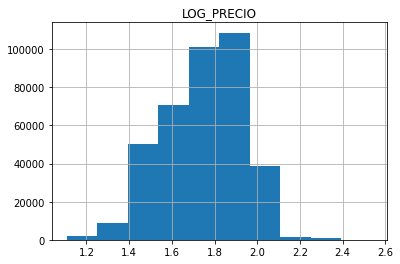

In [59]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 15############
df_renfe_prep["LOG_PRECIO"]=np.log10(df_renfe_prep["PRECIO"])
df_renfe_prep.hist(column="LOG_PRECIO")


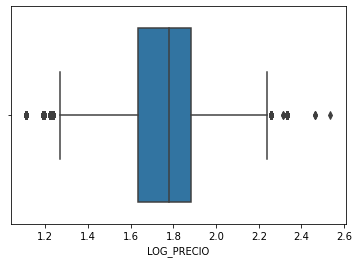

In [60]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 15############
outliers_precio2 = sns.boxplot(x=df_renfe_prep["LOG_PRECIO"])

In [61]:
#A continuación vamos a analizar la variable que queremos predecir PRECIO como se comporta frente a las demás variables#

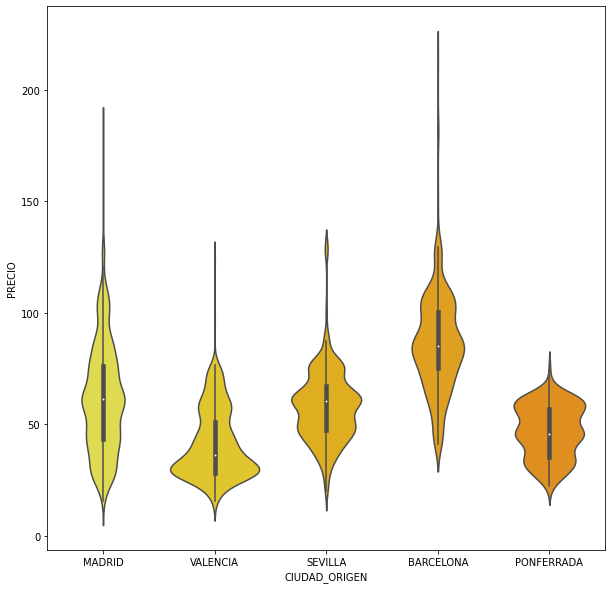

In [62]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 15############
#Relación CIUDAD_ORIGEN vs PRECIO
muestra=pd.DataFrame(df_renfe_prep.sample(frac=0.01, random_state=1))
muestra.shape

plt.figure(figsize=(10,10))
sns.violinplot(x="CIUDAD_ORIGEN",y="PRECIO", data=muestra, palette="Wistia")

In [63]:
'''PREGUNTA 16
16. Relación del Día de inicio de viaje y el precio, 
¿Hay algún día que muestre mayor tendencia a un precio más barato?
'''

'PREGUNTA 16\n16. Relación del Día de inicio de viaje y el precio, \n¿Hay algún día que muestre mayor tendencia a un precio más barato?\n'

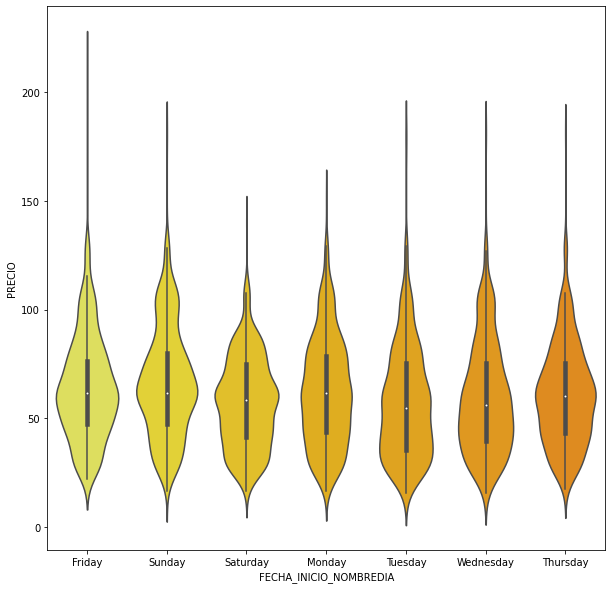

In [64]:
muestra=pd.DataFrame(df_renfe_prep.sample(frac=0.01, random_state=1))
muestra.shape

plt.figure(figsize=(10,10))
sns.violinplot(x="FECHA_INICIO_NOMBREDIA",y="PRECIO", data=muestra, palette="Wistia")   #hem d'analitzar el nombre del dia, sino es imposible

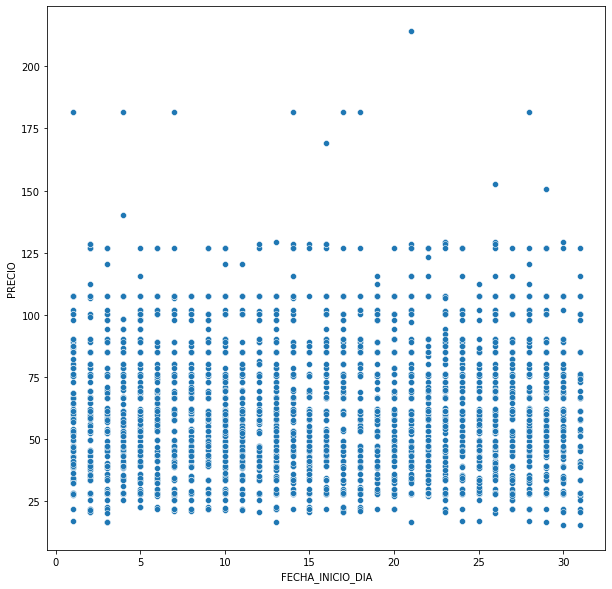

In [65]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 16############
##Scatterplot de precio vs fecha inicio
plt.figure(figsize=(10,10))
sns.scatterplot(x="FECHA_INICIO_DIA", y="PRECIO",data=muestra)
####################################

In [66]:
'''PREGUNTA 17
17. Relación del tiempo de duración del viaje y el precio ¿Ves alguna relación?
'''

'PREGUNTA 17\n17. Relación del tiempo de duración del viaje y el precio ¿Ves alguna relación?\n'

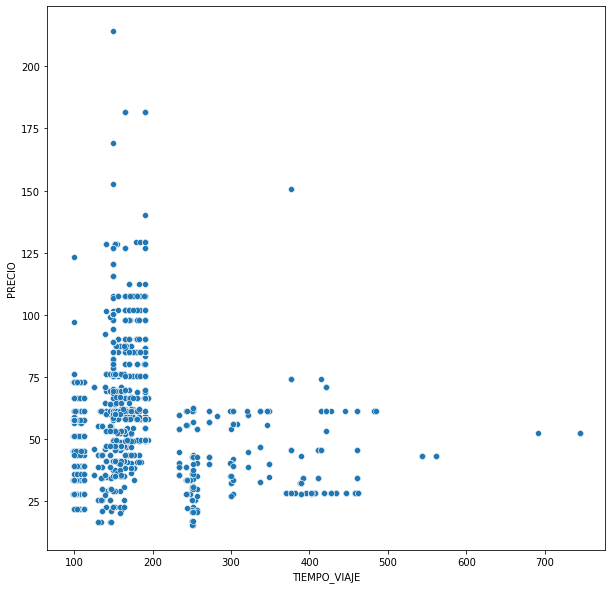

In [67]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="TIEMPO_VIAJE", y="PRECIO",data=muestra) #A MAYOR TIEMPO DE VIAJE MAS BARATO ES EL BILLETE

In [68]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 17############
df_renfe_prep.head()
df_renfe_prep2=df_renfe_prep.copy(deep=True)

target=["PRECIO","LOG_PRECIO"]

def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype=="float64" or dataset[i].dtype=="int64" or dataset[i].dtype=="uint8") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype=="float64" or dataset[i].dtype=="int64" or dataset[i].dtype=="uint8") and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype=="object")  and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

lista_numericas,lista_boolean,lista_categoricas=obtener_lista_variables(df_renfe_prep2)

lista_categoricas
####################################

['CIUDAD_ORIGEN',
 'CIUDAD_DESTINO',
 'TIPO_TREN',
 'TIPO_TARIFA',
 'CLASE',
 'FECHA_INICIO_NOMBREDIA',
 'FECHA_FIN_NOMBREDIA']

In [69]:
'''PREGUNTA 18
18. Para las variables categóricas vamos a realizar el OneHotEncoding, ¿Qué significa esto?
'''

'PREGUNTA 18\n18. Para las variables categóricas vamos a realizar el OneHotEncoding, ¿Qué significa esto?\n'

In [70]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 18############
df_renfe_prep3=pd.get_dummies(data=df_renfe_prep2,
                               prefix=None, 
                               prefix_sep="_",
                               columns=lista_categoricas,
                               drop_first="True")


df_renfe_prep3.head()

corr = df_renfe_prep3.corr()


df_renfe_prep3.drop(["FECHA_FIN_NOMBREDIA_Monday","FECHA_FIN_NOMBREDIA_Saturday",
                "FECHA_FIN_NOMBREDIA_Sunday","FECHA_FIN_NOMBREDIA_Wednesday",
                "FECHA_FIN_NOMBREDIA_Tuesday","FECHA_FIN_NOMBREDIA_Thursday"],axis=1, inplace=True)


In [71]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 18############
#Tuneando más las variables
lista_numericas,lista_boolean,lista_categoricas=obtener_lista_variables(df_renfe_prep3)

lista_numericas

for i in lista_numericas:
    temp=MinMaxScaler(copy=True)
    df_renfe_prep3[i] = temp.fit_transform(df_renfe_prep3[i].values.reshape(-1,1))


df_renfe_prep3.head()

df_renfe_final=df_renfe_prep3.copy()

df_renfe_final.drop("PRECIO",axis=1,inplace=True)



In [72]:
df_renfe_final

,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_INICIO_HORA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,LOG_PRECIO,CIUDAD_ORIGEN_MADRID,CIUDAD_ORIGEN_PONFERRADA,CIUDAD_ORIGEN_SEVILLA,...,CLASE_Turista Plus,CLASE_Turista PlusSólo plaza H,CLASE_Turista con enlace,CLASE_TuristaSólo plaza H,FECHA_INICIO_NOMBREDIA_Monday,FECHA_INICIO_NOMBREDIA_Saturday,FECHA_INICIO_NOMBREDIA_Sunday,FECHA_INICIO_NOMBREDIA_Thursday,FECHA_INICIO_NOMBREDIA_Tuesday,FECHA_INICIO_NOMBREDIA_Wednesday
0,0.092736,0.581690,0.90,0.900000,0.333333,1.000000,1.827369,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.142195,0.365667,0.40,0.433333,0.500000,0.565217,2.032216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.080371,0.607046,0.55,0.733333,0.166667,0.695652,1.674861,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.559505,0.313087,0.60,0.933333,0.166667,0.956522,1.452553,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.125193,0.798297,0.55,0.833333,0.333333,0.695652,1.824451,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382857,0.017002,0.076833,0.85,0.300000,0.166667,0.913043,1.863917,1,0,0,...,0,0,0,0,0,0,0,0,0,0
382858,0.142195,0.784704,0.90,0.133333,0.666667,1.000000,1.735998,0,0,0,...,0,0,0,0,1,0,0,0,0,0
382859,0.003091,0.078519,0.70,0.933333,0.000000,0.739130,1.444045,0,0,0,...,0,0,0,0,1,0,0,0,0,0
382860,0.066461,0.681369,0.65,0.200000,0.500000,0.739130,1.674861,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [73]:
#hacemos el modelo, nos quedamos con el PRECIO. vamos a predecir el precio

In [74]:
#PASO 1

from sklearn.model_selection import train_test_split

In [76]:
df_renfe_final

,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_INICIO_HORA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,LOG_PRECIO,CIUDAD_ORIGEN_MADRID,CIUDAD_ORIGEN_PONFERRADA,CIUDAD_ORIGEN_SEVILLA,...,CLASE_Turista Plus,CLASE_Turista PlusSólo plaza H,CLASE_Turista con enlace,CLASE_TuristaSólo plaza H,FECHA_INICIO_NOMBREDIA_Monday,FECHA_INICIO_NOMBREDIA_Saturday,FECHA_INICIO_NOMBREDIA_Sunday,FECHA_INICIO_NOMBREDIA_Thursday,FECHA_INICIO_NOMBREDIA_Tuesday,FECHA_INICIO_NOMBREDIA_Wednesday
0,0.092736,0.581690,0.90,0.900000,0.333333,1.000000,1.827369,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.142195,0.365667,0.40,0.433333,0.500000,0.565217,2.032216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.080371,0.607046,0.55,0.733333,0.166667,0.695652,1.674861,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.559505,0.313087,0.60,0.933333,0.166667,0.956522,1.452553,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.125193,0.798297,0.55,0.833333,0.333333,0.695652,1.824451,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382857,0.017002,0.076833,0.85,0.300000,0.166667,0.913043,1.863917,1,0,0,...,0,0,0,0,0,0,0,0,0,0
382858,0.142195,0.784704,0.90,0.133333,0.666667,1.000000,1.735998,0,0,0,...,0,0,0,0,1,0,0,0,0,0
382859,0.003091,0.078519,0.70,0.933333,0.000000,0.739130,1.444045,0,0,0,...,0,0,0,0,1,0,0,0,0,0
382860,0.066461,0.681369,0.65,0.200000,0.500000,0.739130,1.674861,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [77]:
#x son las variables independientes y las variables y las dependientes
X= df_renfe_final.drop("LOG_PRECIO", axis=1)

In [78]:
y= df_renfe_final["LOG_PRECIO"]

In [79]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=23) #el 30% para test i 70% para train

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lin_reg= LinearRegression()

In [82]:
lin_reg.fit(X_train,y_train) #el modelo entrena con estos datos. el model

LinearRegression()

In [83]:
y_pred= lin_reg.predict(X_test)

In [84]:
y_pred

array([1.64407249, 1.55672598, 1.87127517, ..., 1.58998403, 1.83139216,
       1.67158918])

In [85]:
y_test

49240     1.614897
225152    1.761552
354161    1.896526
86496     2.001734
175792    1.462398
            ...   
87925     1.991226
338341    1.788216
203251    1.656098
137768    1.841359
294158    1.614897
Name: LOG_PRECIO, Length: 114859, dtype: float64

In [86]:
df_resultados= pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).apply(lambda x: 10**x) #como habiamos hecho la log10, revertimos el logaritmo

In [87]:
df_resultados

,Actual,Predicted
49240,41.200000,44.062840
225152,57.750000,36.035120
354161,78.800000,74.349007
86496,100.400000,75.577205
175792,29.000000,45.410015
...,...,...
87925,98.000000,99.962896
338341,61.406744,116.591348
203251,45.300000,38.903084
137768,69.400000,67.825368
